In [1]:
import os
from scipy import stats
import pandas as pd
import numpy as np

In [2]:
#odir="/srv/www/kundaje/anusri/chrombpnet_models_mpra/variant_scores/"
odir="/mnt/lab_data2/anusri/variant-scorer/src/output/CAGI/output/"
dirs = os.listdir(odir)

enformer = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/enformer/allGroupsBenchmark.txt", sep="\t", header=0)
enformer.head()

,Locus,deltaSVM,Enf.CAGE.Agnostic,Enf.CAGE,Enf.DNase.Agnostic,Enf.DNase,Enformer,G3,G7,dSVM LASSO,dSVM RF,dSVM (1 DHS),G5,CADD,Inter-replicate
0,F9,0.483518,0.245,0.252,0.573,0.291,0.572,0.624,0.391,0.557,0.566,0.489,0.564,-0.086,0.88
1,GP1BB,NaN,0.370,0.469,0.555,0.564,0.563,0.556,0.566,0.261,0.371,0.421,0.348,-0.083,0.88
2,HBB,NaN,0.491,0.596,0.550,0.578,0.600,0.446,0.416,0.445,0.328,0.393,0.392,0.049,0.77
3,HBG1,NaN,0.178,0.302,0.104,0.189,0.474,0.571,0.591,0.397,0.439,0.342,0.479,0.174,0.92
4,HNF4A,0.091578,0.173,0.156,0.170,0.288,0.335,0.339,0.397,0.225,0.151,0.134,0.191,0.111,0.89


In [3]:
dataset_to_pear = {}
dataset_to_vals = {}
labels={}

for idir in dirs: 
    idir=str(idir)
    ifile=odir+idir+"/summary.mean.variant_scores_new_2.tsv"
    if os.path.isfile(ifile):
        if not ifile.endswith("tsv"):
            continue
        data = pd.read_csv(ifile, sep="\t", header=0)
        #print(data.head())
        data[["chr_temp", "pos_temp", "ref_temp", "alt_temp", "label", "Confidence", "challenge"]] = data["rsid"].str.split(",", expand=True)
        grouped = data.groupby("challenge")
        for g in list(grouped):
            df = g[1]
            if g[0] not in dataset_to_pear:
                    dataset_to_pear[g[0]] = []
                    dataset_to_vals[g[0]] = []
                    labels[g[0]] = df["label"].astype(float).values
            #pears=stats.pearsonr(df["label"].astype(float), df["jsd.mean"].astype(float)*np.sign(df['logfc.mean'].astype(float)))[0]
            pears=stats.pearsonr(df["label"].astype(float), df['logfc.mean'].astype(float))[0]

            dataset_to_pear[g[0]].append(pears)
              

In [4]:
best_dataset_to_pear = {}
for key in dataset_to_pear:
    print(dataset_to_pear[key])
    best_dataset_to_pear[key] = np.max(dataset_to_pear[key])

[0.32193638902963084, 0.3414646145553015, 0.1887277639068928, 0.2891811987098261, 0.3984857758855108, 0.31174904895986527, 0.3192111247029, 0.44484781066968043, 0.2927436490770697, 0.2958126463496242]
[0.6841190910774478, 0.6860985124263778, 0.6853042263564131]
[0.8154299895742269]
[0.5213276765530211]
[0.5472988538268535]
[0.5416481138583874]
[0.8120202837314338]
[0.3275628031599529]
[0.5571818417723304]
[0.7608707755348065]
[0.33885305062040927]
[0.19856415224540452]
[0.5078362906951961]
[0.5553154805041812]


In [5]:
best_dataset_to_pear

{'challenge_ZFAND3.tsv': 0.44484781066968043,
 'challenge_IRF6.tsv': 0.6860985124263778,
 'challenge_IRF4.tsv': 0.8154299895742269,
 'challenge_GP1BB.tsv': 0.5213276765530211,
 'challenge_HBB.tsv': 0.5472988538268535,
 'challenge_HBG1.tsv': 0.5416481138583874,
 'challenge_PKLR.tsv': 0.8120202837314338,
 'challenge_F9.tsv': 0.3275628031599529,
 'challenge_LDLR.tsv': 0.5571818417723304,
 'challenge_SORT1.tsv': 0.7608707755348065,
 'challenge_HNF4A.tsv': 0.33885305062040927,
 'challenge_MSMB.tsv': 0.19856415224540452,
 'challenge_MYCrs6983267.tsv': 0.5078362906951961,
 'challenge_TERT-HEK293T.tsv': 0.5553154805041812}

In [6]:
data = pd.DataFrame(best_dataset_to_pear.items(), columns=["gene", 'correlation']) 
data["gene"] = data["gene"].str.replace("challenge_","").str.replace(".tsv","")
data.loc[len(data.index)] = ["TERT-GBM", 0]

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [7]:
keys = ["TERT-GBM", "PKLR", "LDLR", "IRF4", "TERT-HEK293T", "HBB", "F9", "GP1BB", "IRF6", "SORT1", "ZFAND3", "HBG1", "MYCrs6983267", "HNF4A", "MSMB"]
final_coorelations_chrombpnet = []
final_coorelations_enformer = []
keysl = []
for key in keys:
    final_coorelations_chrombpnet.append(data[data["gene"]==key]["correlation"].values[0])
    if key=="TERT-GBM":
        key="TERT(GBM)"
    if key=="TERT-HEK293T":
        key="TERT(HEK293T)"
    if key=="MYCrs6983267":
        key="MYC"
    print(key)
    keysl.append(key)
    final_coorelations_enformer.append(enformer[enformer["Locus"]==key]["Enf.DNase"].values[0])



TERT(GBM)
PKLR
LDLR
IRF4
TERT(HEK293T)
HBB
F9
GP1BB
IRF6
SORT1
ZFAND3
HBG1
MYC
HNF4A
MSMB


TERT(GBM) (0.0, nan)
PKLR (0.8120202837314338, 0.809)
LDLR (0.5571818417723304, 0.628)
IRF4 (0.8154299895742269, 0.714)
TERT(HEK293T) (0.5553154805041812, 0.587)
HBB (0.5472988538268535, 0.578)
F9 (0.3275628031599529, 0.291)
GP1BB (0.5213276765530211, 0.564)
IRF6 (0.6860985124263778, 0.648)
SORT1 (0.7608707755348065, 0.619)
ZFAND3 (0.44484781066968043, 0.45)
HBG1 (0.5416481138583874, 0.189)
MYC (0.5078362906951961, 0.559)
HNF4A (0.33885305062040927, 0.288)
MSMB (0.19856415224540452, 0.119)


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


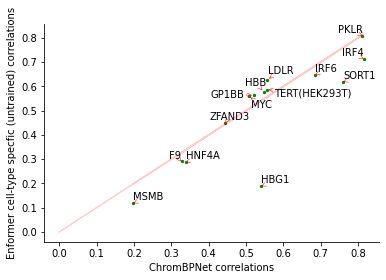

In [8]:
from adjustText import adjust_text
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots()

ax.scatter(final_coorelations_chrombpnet,final_coorelations_enformer, s=5, c="g")
ax.plot(final_coorelations_chrombpnet,final_coorelations_chrombpnet, c="r",  alpha=0.2)
ax.set_xlabel("ChromBPNet correlations")
ax.set_ylabel("Enformer cell-type specfic (untrained) correlations")

texts = []
for i, txt in enumerate(keys):
    print(keysl[i], (final_coorelations_chrombpnet[i], final_coorelations_enformer[i]))
    texts.append(plt.text(final_coorelations_chrombpnet[i], final_coorelations_enformer[i], keysl[i]))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
ax.spines[["top", "right"]].set_visible(False)

plt.savefig("subfigs/cagi_logfc.pdf", transparent=True, dpi=300)

In [9]:
dataset_to_pear = {}
dataset_to_vals = {}
labels={}

for idir in dirs: 
    idir=str(idir)
    ifile=odir+idir
    if os.path.isfile(ifile):
        if not ifile.endswith("tsv"):
            continue

        #print(ifile)
        data = pd.read_csv(ifile, sep="\t", header=0)
        data[["chr_temp", "pos_temp", "ref_temp", "alt_temp", "label", "Confidence", "challenge"]] = data["rsid"].str.split(",", expand=True)
        grouped = data.groupby("challenge")
        for g in list(grouped):
            df = g[1]
            if g[0] not in dataset_to_pear:
                    dataset_to_pear[g[0]] = []
                    dataset_to_vals[g[0]] = []
                    labels[g[0]] = df["label"].astype(float).values
            pears=stats.pearsonr(df["label"].astype(float), df["jsd.mean"].astype(float)*np.sign(df['logfc.mean'].astype(float)))[0]

            dataset_to_pear[g[0]].append(pears)



[0.26121420522216976, 0.2956343407119622, 0.10199100387176496, 0.2716437637815248, 0.31924331847152715, 0.2828748779109874, 0.29365380659535606, 0.3968265961621204, 0.2636786272828819, 0.26991422573396806]
[0.5042496309112188, 0.4779495300404426, 0.555157194729831]
[0.7497534109732615]
[0.42540813836968683]
[0.5698413608177562]
[0.5017067346770685]
[0.7929239856356867]
[0.4529915899243378]
[0.5467644140523147]
[0.708269007627931]
[0.3101191262850677]
[0.2389035758206448]
[0.5084297791443301]
[0.4943933566895047]
TERT(GBM)
PKLR
LDLR
IRF4
TERT(HEK293T)
HBB
F9
GP1BB
IRF6
SORT1
ZFAND3
HBG1
MYC
HNF4A
MSMB
TERT(GBM) (0.0, nan)
PKLR (0.7929239856356867, 0.809)
LDLR (0.5467644140523147, 0.628)
IRF4 (0.7497534109732615, 0.714)
TERT(HEK293T) (0.4943933566895047, 0.587)
HBB (0.5698413608177562, 0.578)
F9 (0.4529915899243378, 0.291)
GP1BB (0.42540813836968683, 0.564)
IRF6 (0.555157194729831, 0.648)
SORT1 (0.708269007627931, 0.619)
ZFAND3 (0.3968265961621204, 0.45)
HBG1 (0.5017067346770685, 0.189)


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


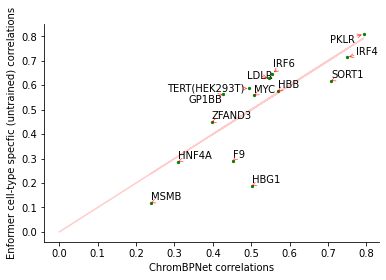

In [10]:
best_dataset_to_pear = {}
for key in dataset_to_pear:
    print(dataset_to_pear[key])
    best_dataset_to_pear[key] = np.max(dataset_to_pear[key])
    
data = pd.DataFrame(best_dataset_to_pear.items(), columns=["gene", 'correlation']) 
data["gene"] = data["gene"].str.replace("challenge_","").str.replace(".tsv","")
data.loc[len(data.index)] = ["TERT-GBM", 0]

keys = ["TERT-GBM", "PKLR", "LDLR", "IRF4", "TERT-HEK293T", "HBB", "F9", "GP1BB", "IRF6", "SORT1", "ZFAND3", "HBG1", "MYCrs6983267", "HNF4A", "MSMB"]
final_coorelations_chrombpnet = []
final_coorelations_enformer = []
keysl = []
for key in keys:
    final_coorelations_chrombpnet.append(data[data["gene"]==key]["correlation"].values[0])
    if key=="TERT-GBM":
        key="TERT(GBM)"
    if key=="TERT-HEK293T":
        key="TERT(HEK293T)"
    if key=="MYCrs6983267":
        key="MYC"
    print(key)
    keysl.append(key)
    final_coorelations_enformer.append(enformer[enformer["Locus"]==key]["Enf.DNase"].values[0])

from adjustText import adjust_text
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots()

ax.scatter(final_coorelations_chrombpnet,final_coorelations_enformer, s=5, c="g")
ax.plot(final_coorelations_chrombpnet,final_coorelations_chrombpnet, c="r",  alpha=0.2)
ax.set_xlabel("ChromBPNet correlations")
ax.set_ylabel("Enformer cell-type specfic (untrained) correlations")

texts = []
for i, txt in enumerate(keys):
    print(keysl[i], (final_coorelations_chrombpnet[i], final_coorelations_enformer[i]))
    texts.append(plt.text(final_coorelations_chrombpnet[i], final_coorelations_enformer[i], keysl[i]))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
ax.spines[["top", "right"]].set_visible(False)



plt.savefig("subfigs/cagi_jsd.pdf", transparent=True, dpi=300)

In [11]:
f9 = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/enformer_preds/alldata/HBG1.ZigaDataLocal.csv", header=0)


In [12]:
f9

,data.Value,dnase,data.Position
0,0.19,-0.069240,5249805
1,0.07,0.011861,5249805
2,-0.72,0.035393,5249805
3,0.14,-0.174114,5249806
4,0.09,0.010160,5249806
...,...,...,...
625,-0.08,-0.967332,5250077
626,0.13,-0.653998,5250077
627,-0.04,1.184885,5250078
628,0.24,0.003179,5250078


(0.18851068518283778, 1.8888239190707555e-06)


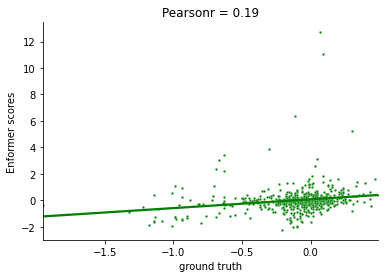

In [18]:

import seaborn as sns
fig, ax =  plt.subplots()
ax = sns.scatterplot(x="data.Value", y="dnase", data=f9, s=6, color="green")
sns.regplot(x="data.Value", y="dnase", data=f9, scatter=False, ci=None, color="green")
ax.set_xlabel("ground truth")
ax.set_ylabel("Enformer scores")
ax.set_title("Pearsonr = "+str(np.round(stats.pearsonr(f9["data.Value"],f9["dnase"])[0],2)))
ax.spines[["top", "right"]].set_visible(False)

print(stats.pearsonr(f9["data.Value"],f9["dnase"]))

plt.savefig("subfigs/cagi_enformer_hbg1.pdf", transparent=True, dpi=300)

In [ ]:
f9 = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/enformer_preds/alldata/HBG1.ZigaDataLocal.csv", header=0)


In [14]:

import numpy as np
dataset = {}

data = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/models_to_score.csv",sep=',',header=None)
print(data.head())

per_expt={}
pre_expt_gt={}
num_per_fold = {}
for i,r in data.iterrows():
        filename = r[0]
        fold = r[1]     
        title = r[2]
        modelpath = r[3]
        modelname = r[4]
        if str(modelpath) == "nan":
                continue
        outdir = "/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/output/"+title+"/"+filename.replace(".tsv","")+"/"

        title = title+".."+filename
        print(title,filename)
        print(title)

        if os.path.isfile(outdir+fold+"/snp_scores.tsv"):
                if title not in per_expt:
                        per_expt[title] = {}
                        #per_expt[title]["filename"] = filename

                        per_expt[title]["probs_jsd_diff"] = []
                        per_expt[title]["log_counts_diff"] = []
                        per_expt[title]["log_probs_diff_abs_sum"] = []
                        per_expt[title]["jsd_and_counts_diff"] = []
                        num_per_fold[title] = 0


                results = pd.read_csv(outdir+fold+"/snp_scores.tsv", sep="\t", header=0)
                #print(results.shape)
                per_expt[title]["probs_jsd_diff"].append(results["probs_jsd_diff"])
                per_expt[title]["log_counts_diff"].append(results["log_counts_diff"])
                per_expt[title]["log_probs_diff_abs_sum"].append(results["log_probs_diff_abs_sum"])
                combine = np.abs(results["probs_jsd_diff"]) * results["log_counts_diff"]
                per_expt[title]["jsd_and_counts_diff"].append(combine)
                values = results["META_DATA"].str.split(",").str[4].astype(float).tolist()
                #print(np.array(values).shape)
                num_per_fold[title]+=1
                if title not in pre_expt_gt:
                        pre_expt_gt[title] = values
                else:
                        assert(values==pre_expt_gt[title])

                        


                     0      1      2  \
0     challenge_F9.tsv  fold0  HEPG2   
1   challenge_LDLR.tsv  fold0  HEPG2   
2  challenge_SORT1.tsv  fold0  HEPG2   
3  challenge_GP1BB.tsv  fold0   K562   
4    challenge_HBB.tsv  fold0   K562   

                                                   3                 4  
0  /mnt/lab_data2/anusri/chrombpnet/results/chrom...  chrombpnet_model  
1  /mnt/lab_data2/anusri/chrombpnet/results/chrom...  chrombpnet_model  
2  /mnt/lab_data2/anusri/chrombpnet/results/chrom...  chrombpnet_model  
3  /mnt/lab_data2/anusri/chrombpnet/results/chrom...  chrombpnet_model  
4  /mnt/lab_data2/anusri/chrombpnet/results/chrom...  chrombpnet_model  
HEPG2..challenge_F9.tsv challenge_F9.tsv
HEPG2..challenge_F9.tsv
HEPG2..challenge_LDLR.tsv challenge_LDLR.tsv
HEPG2..challenge_LDLR.tsv
HEPG2..challenge_SORT1.tsv challenge_SORT1.tsv
HEPG2..challenge_SORT1.tsv
K562..challenge_GP1BB.tsv challenge_GP1BB.tsv
K562..challenge_GP1BB.tsv
K562..challenge_HBB.tsv challenge_HBB.t

ENCSR056PFI_pancreas..challenge_ZFAND3.tsv challenge_ZFAND3.tsv
ENCSR056PFI_pancreas..challenge_ZFAND3.tsv
ENCSR236KPK_pancreas..challenge_ZFAND3.tsv challenge_ZFAND3.tsv
ENCSR236KPK_pancreas..challenge_ZFAND3.tsv
ENCSR828FVZ_pancreas..challenge_ZFAND3.tsv challenge_ZFAND3.tsv
ENCSR828FVZ_pancreas..challenge_ZFAND3.tsv
ENCSR999VDH_pancreas..challenge_ZFAND3.tsv challenge_ZFAND3.tsv
ENCSR999VDH_pancreas..challenge_ZFAND3.tsv
ENCSR539WBA_pancreas..challenge_ZFAND3.tsv challenge_ZFAND3.tsv
ENCSR539WBA_pancreas..challenge_ZFAND3.tsv
ENCSR464TKV_pancreas..challenge_ZFAND3.tsv challenge_ZFAND3.tsv
ENCSR464TKV_pancreas..challenge_ZFAND3.tsv
ENCSR236KPK_pancreas..challenge_ZFAND3.tsv challenge_ZFAND3.tsv
ENCSR236KPK_pancreas..challenge_ZFAND3.tsv
ENCSR595HZQ_pancreas..challenge_ZFAND3.tsv challenge_ZFAND3.tsv
ENCSR595HZQ_pancreas..challenge_ZFAND3.tsv
ENCSR724CND_keratinocyte..challenge_IRF6.tsv challenge_IRF6.tsv
ENCSR724CND_keratinocyte..challenge_IRF6.tsv
ENCSR035RVH_keratinocyte..challenge

K562..challenge_HBG1.tsv
(0.539219789977537, 4.9428887935742324e-49)


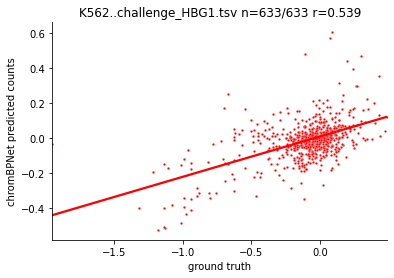

In [17]:
#for title in per_expt:
print(title)
# if title !="K562..challenge_HBB.tsv":
#     continue
title="K562..challenge_HBG1.tsv"
filen = title.split("..")[1]
gt_lines = open("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/data/"+filen).readlines()
ensemble1 = np.mean(per_expt[title]["probs_jsd_diff"],axis=0)
ensemble2 = np.mean(per_expt[title]["log_counts_diff"],axis=0)
ensemble3 = np.mean(per_expt[title]["log_probs_diff_abs_sum"],axis=0)
ensemble4 = np.mean(per_expt[title]["jsd_and_counts_diff"],axis=0)
nums = len(ensemble1)
values = pre_expt_gt[title]


filename=title.split("..")[1]
if filename not in dataset:
        dataset[filename] = []


dataset[filename].append(np.round(np.max([stats.pearsonr(ensemble4, values)[0],stats.pearsonr(ensemble1, values)[0], stats.pearsonr(ensemble2, values)[0], stats.pearsonr(ensemble3, values)[0]]),3))
scores_id = np.argmax([stats.pearsonr(ensemble1, values)[0], stats.pearsonr(ensemble2, values)[0], stats.pearsonr(ensemble3, values)[0], stats.pearsonr(ensemble4, values)[0]])

print(stats.pearsonr(ensemble2, values))
scores_id = 1
out_title = ["profile, jsd", "counts", "profile, per base", "profile and counts"]
scores = [ensemble1, ensemble2, ensemble3, ensemble4]
plot_scores = scores[scores_id]
out_title_f = out_title[scores_id]

import seaborn as sns
fig, ax =  plt.subplots()
data = pd.DataFrame()
data["Beta"] = values
data["logfc.mean"] = plot_scores
ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="Red")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="red")
ax.set_title(title+" n="+str(nums)+"/"+str(len(gt_lines)-7)+" r="+str(dataset[filename][-1]))
ax.set_xlabel("ground truth")
ax.set_ylabel("chromBPNet predicted "+out_title_f)
ax.spines[["top", "right"]].set_visible(False)

plt.savefig("subfigs/cagi_chrombpnet_hbg1.pdf", transparent=True, dpi=300)

In [ ]:
#for title in per_expt:
print(title)
# if title !="K562..challenge_HBB.tsv":
#     continue
title="K562..challenge_HBG1.tsv"
filen = title.split("..")[1]
gt_lines = open("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/data/"+filen).readlines()
ensemble1 = np.mean(per_expt[title]["probs_jsd_diff"],axis=0)
ensemble2 = np.mean(per_expt[title]["log_counts_diff"],axis=0)
ensemble3 = np.mean(per_expt[title]["log_probs_diff_abs_sum"],axis=0)
ensemble4 = np.mean(per_expt[title]["jsd_and_counts_diff"],axis=0)
nums = len(ensemble1)
values = pre_expt_gt[title]


filename=title.split("..")[1]
if filename not in dataset:
        dataset[filename] = []


dataset[filename].append(np.round(np.max([stats.pearsonr(ensemble4, values)[0],stats.pearsonr(ensemble1, values)[0], stats.pearsonr(ensemble2, values)[0], stats.pearsonr(ensemble3, values)[0]]),3))
scores_id = np.argmax([stats.pearsonr(ensemble1, values)[0], stats.pearsonr(ensemble2, values)[0], stats.pearsonr(ensemble3, values)[0], stats.pearsonr(ensemble4, values)[0]])

print(stats.pearsonr(ensemble2, values))
scores_id = 1
out_title = ["profile, jsd", "counts", "profile, per base", "profile and counts"]
scores = [ensemble1, ensemble2, ensemble3, ensemble4]
plot_scores = scores[scores_id]
out_title_f = out_title[scores_id]

import seaborn as sns
fig, ax =  plt.subplots()
data = pd.DataFrame()
data["Beta"] = values
data["logfc.mean"] = plot_scores
ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="Red")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="red")
ax.set_title(title+" n="+str(nums)+"/"+str(len(gt_lines)-7)+" r="+str(dataset[filename][-1]))
ax.set_xlabel("ground truth")
ax.set_ylabel("chromBPNet predicted "+out_title_f)
ax.spines[["top", "right"]].set_visible(False)

plt.savefig("subfigs/cagi_chrombpnet_hbg1.pdf", transparent=True, dpi=300)